# Fundamentals of Artificial Intelligence

### Laboratory work Nr.4: Linear Regression

Author: Eugeniu Popa, std.gr. FAF-202

Supervisor: Diana Marusic

Task 1: Make a detailed analysis of the dataset and present some statistics in the form of matplotlib or seaborn visualisations.

         Serial No.  Exam Score  TOEFL Score  University Rating   Grade 5-9  \
count  3.350000e+02  335.000000   335.000000         335.000000  335.000000   
mean   2.495926e+06  316.764179   107.313433           3.095522    5.497761   
std    1.441130e+06   10.992154     6.110286           1.154195    0.393019   
min    1.007500e+04  293.000000    92.000000           1.000000    5.010000   
25%    1.240075e+06  309.000000   102.500000           2.000000    5.240000   
50%    2.490075e+06  317.000000   107.000000           3.000000    5.390000   
75%    3.715075e+06  325.000000   112.000000           4.000000    5.625000   
max    5.000075e+06  340.000000   120.000000           5.000000    7.680000   

              SOP        LOR         CGPA  Chance of Admit  
count  335.000000  335.000000  335.000000       335.000000  
mean     3.380597    3.501493    8.584985         0.726119  
std      0.998088    0.926569    0.593139         0.139732  
min      1.000000    1.500000    6.800000   

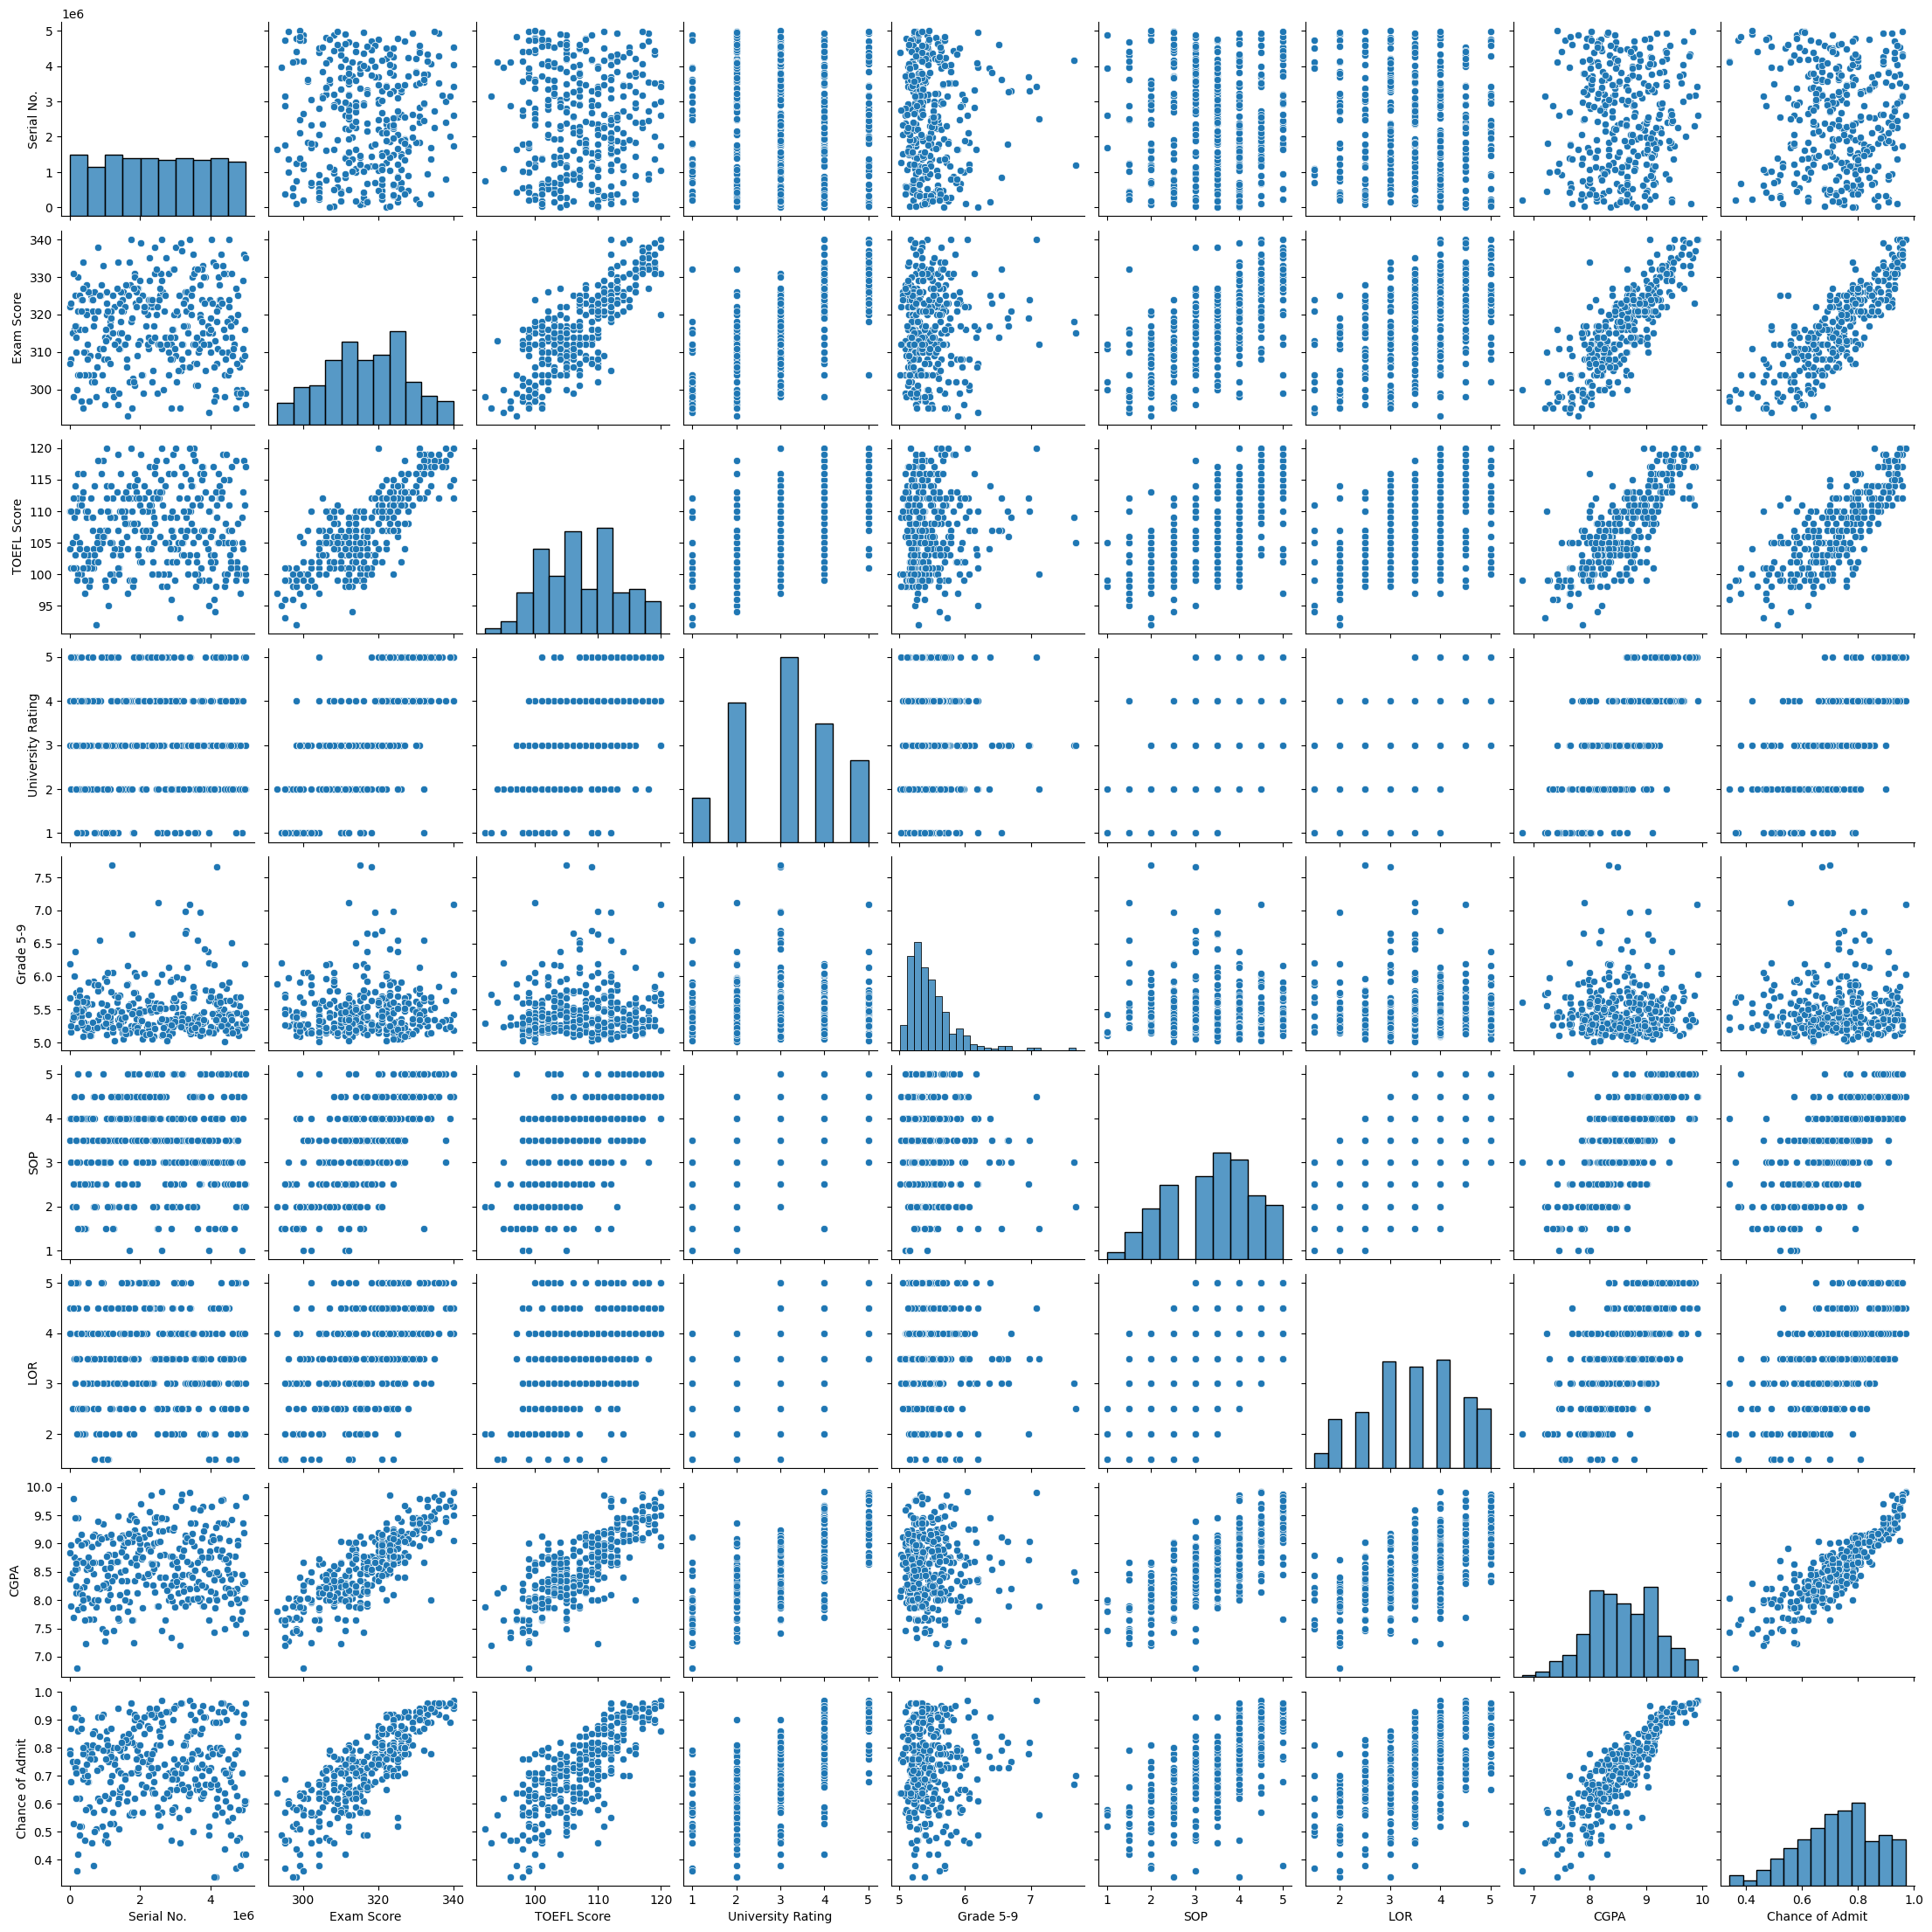

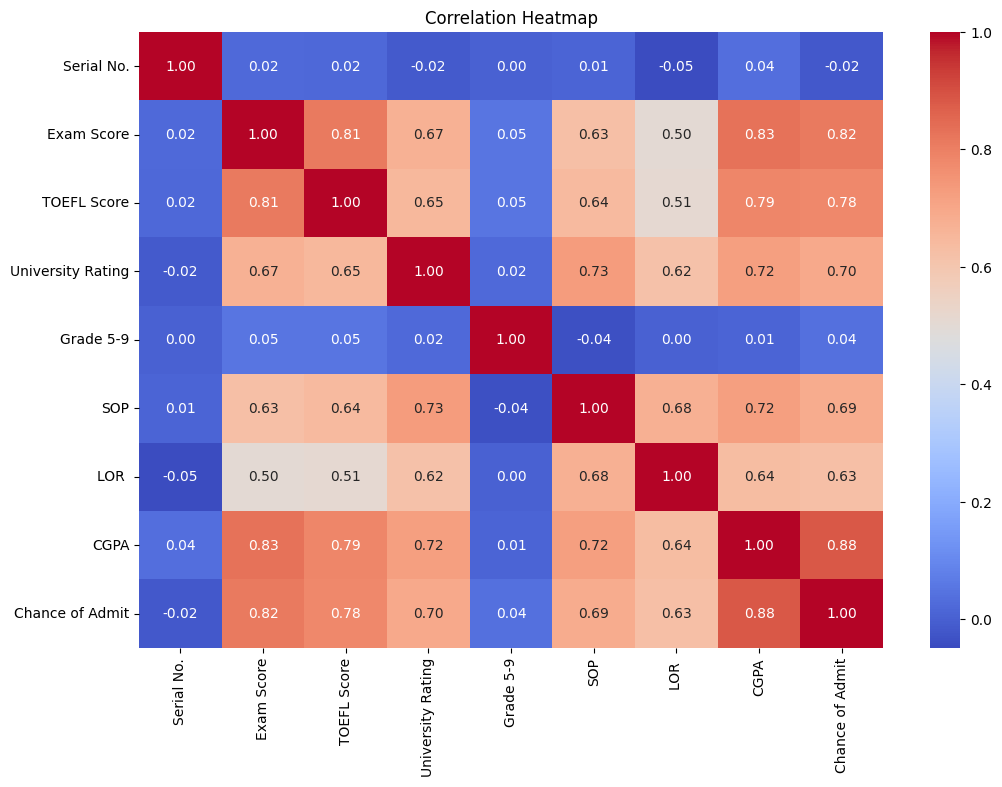

         Serial No.  Exam Score  TOEFL Score  University Rating   Grade 5-9  \
count  1.650000e+02  165.000000   165.000000         165.000000  165.000000   
mean   2.523651e+06  315.878788   106.945455           3.151515    5.538242   
std    1.456499e+06   11.898856     6.034711           1.124050    0.552428   
min    5.007500e+04  290.000000    93.000000           1.000000    5.000000   
25%    1.290075e+06  307.000000   103.000000           2.000000    5.230000   
50%    2.520075e+06  316.000000   106.000000           3.000000    5.410000   
75%    3.860075e+06  324.000000   111.000000           4.000000    5.630000   
max    4.950075e+06  340.000000   120.000000           5.000000   10.000000   

              SOP        LOR         CGPA  
count  165.000000  165.000000  165.000000  
mean     3.360606    3.448485    8.559091  
std      0.979341    0.924966    0.629331  
min      1.000000    1.000000    7.210000  
25%      2.500000    3.000000    8.100000  
50%      3.500000    3.5

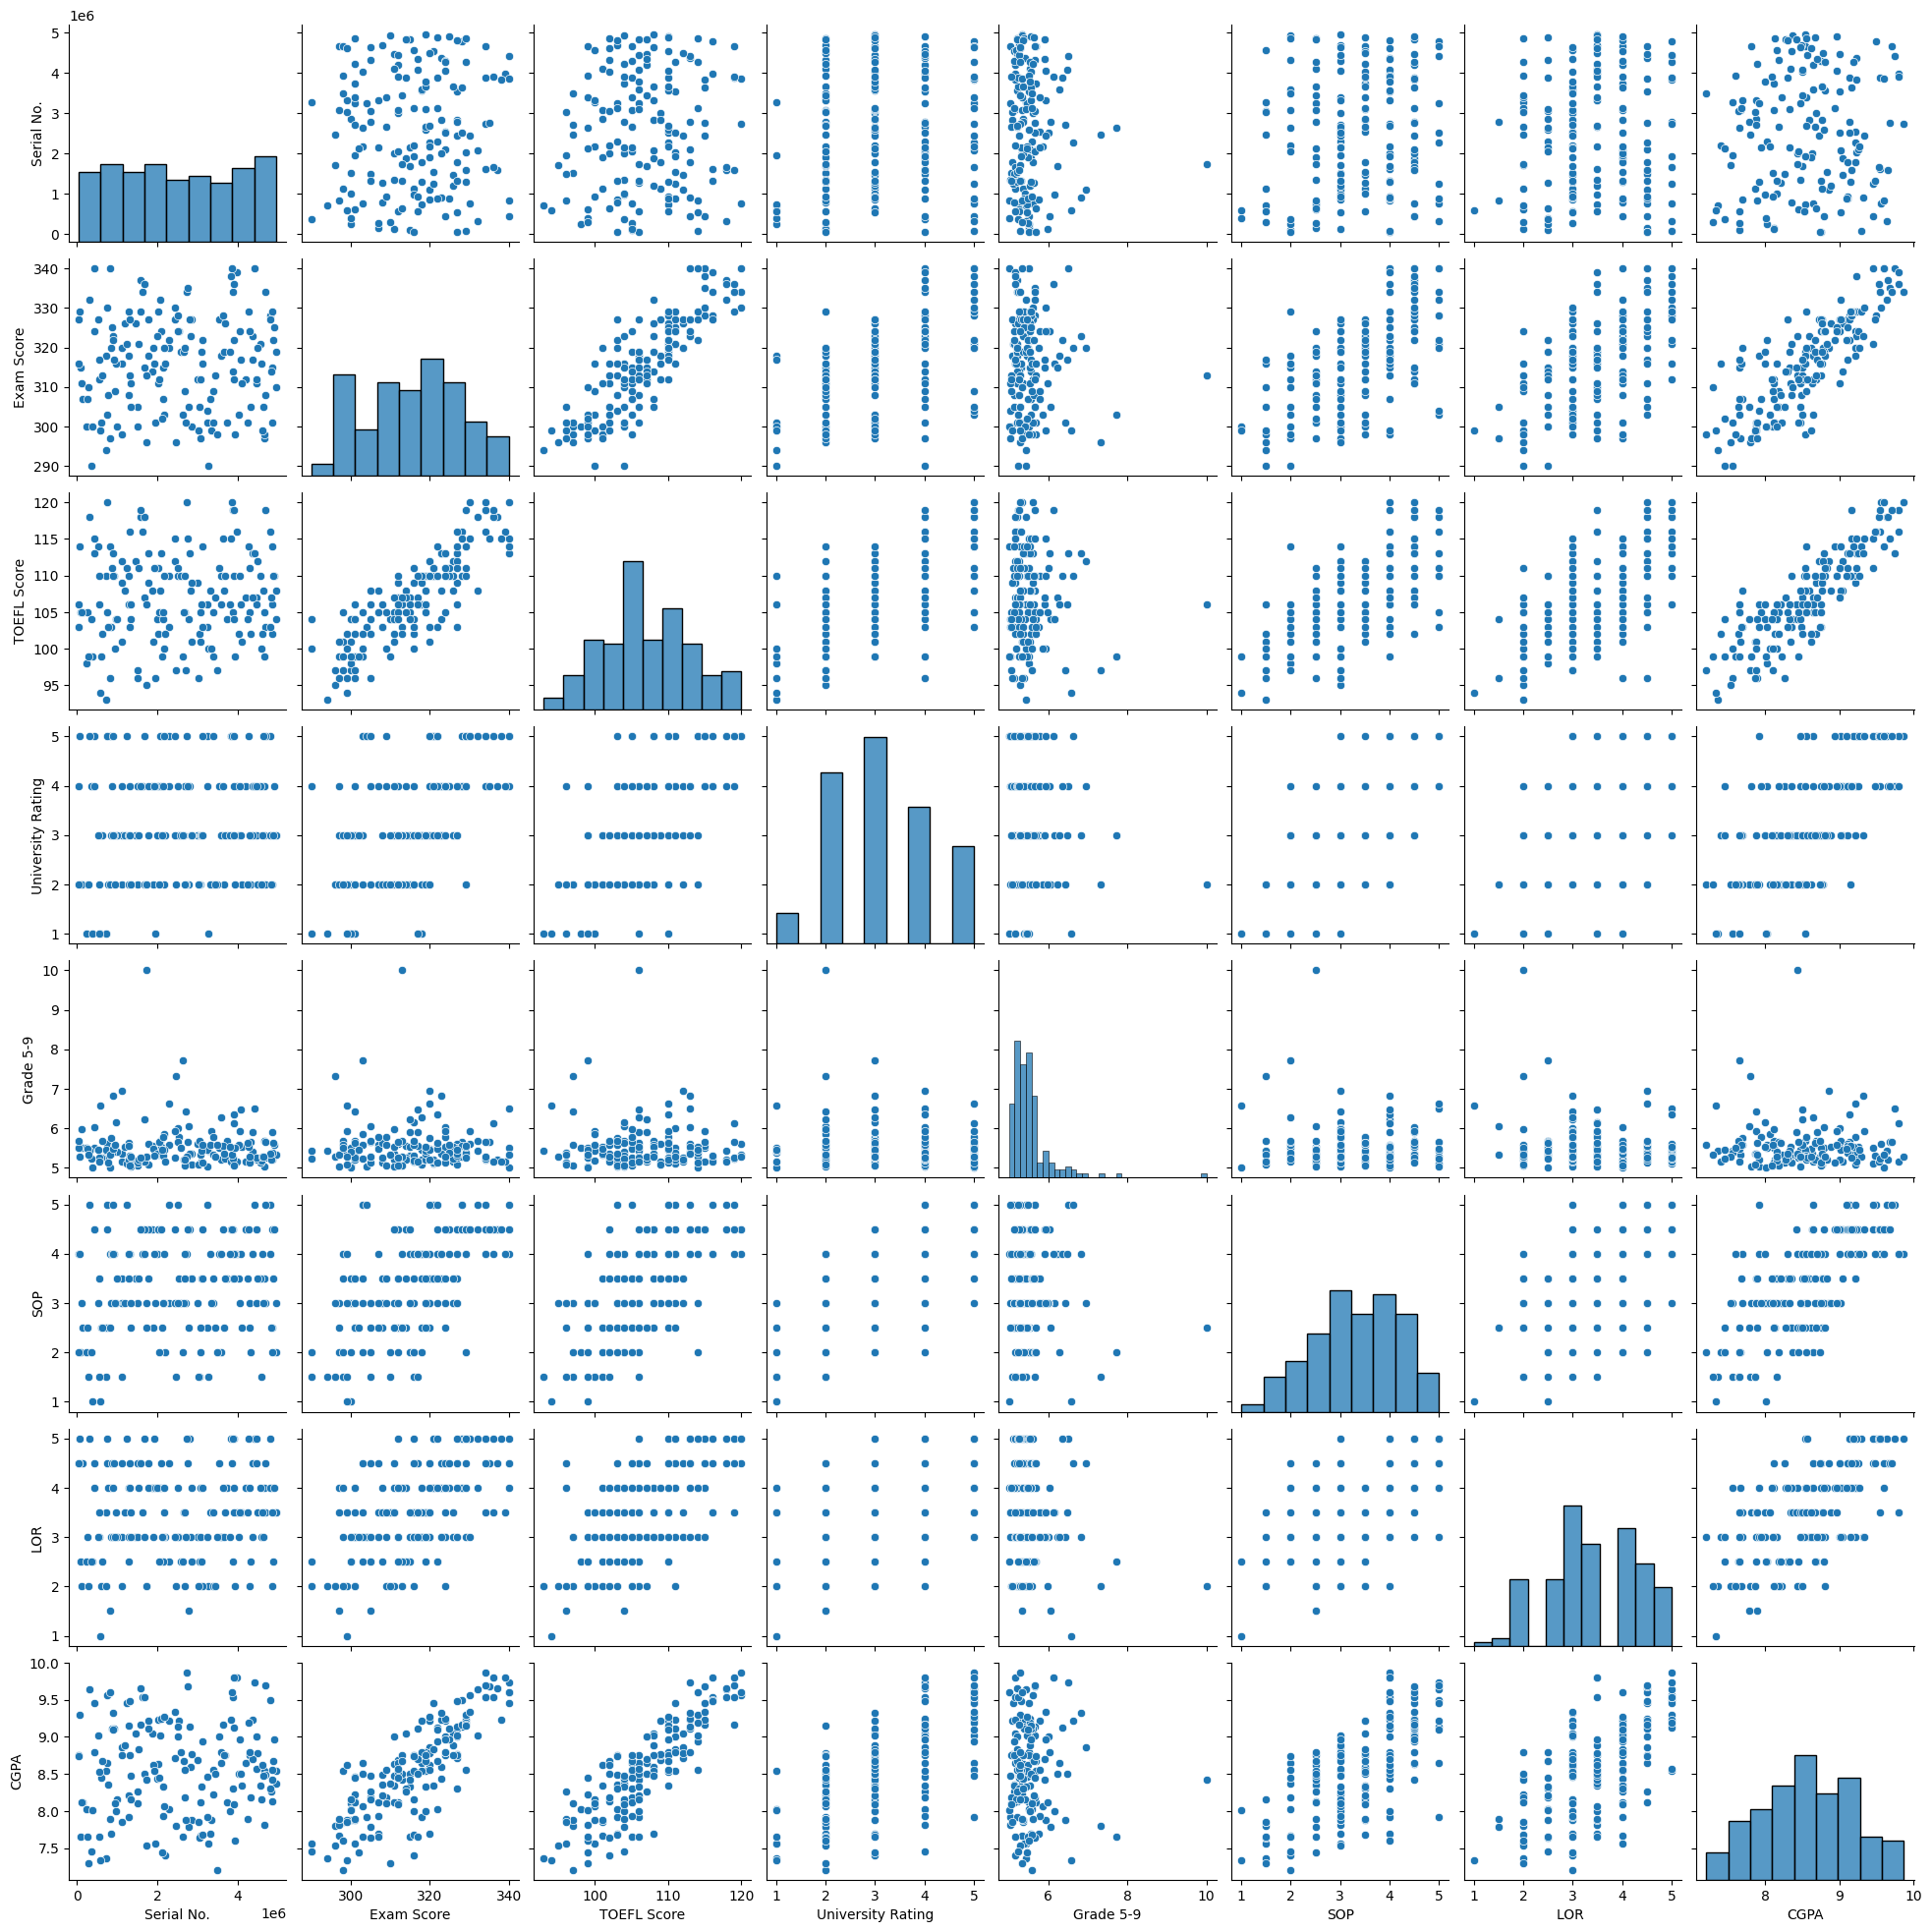

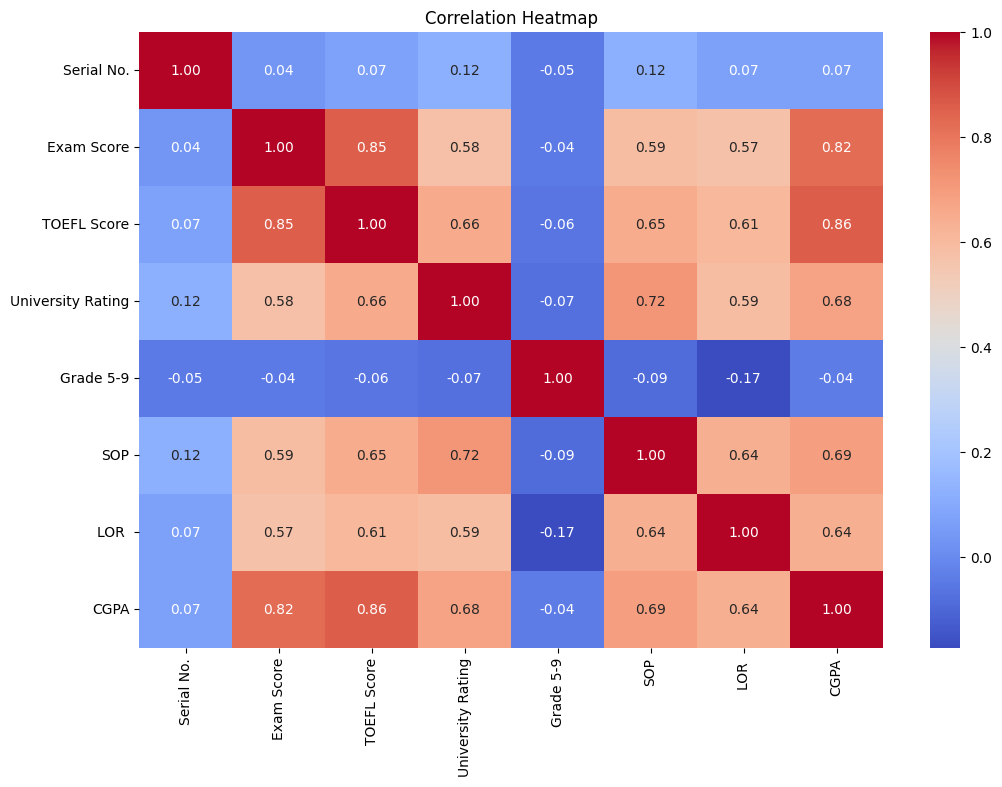

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the train dataset
data = pd.read_csv("train.csv")

# Display basic statistics
print(data.describe())

# Visualize distribution of features
sns.pairplot(data)
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Load the test dataset
test_data = pd.read_csv("test.csv")

# Display basic statistics
print(test_data.describe())

# Visualize distribution of features
sns.pairplot(test_data)
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Task 2: Based on the analysis from task 1, perform Feature Selection. You should state which columns you will be using for the final predictions and argument why you are choosing the respective columns.

,Exam Score,TOEFL Score,University Rating,Grade 5-9,SOP,CGPA,Chance of Admit
0,311,103,3,5.36,2.0,8.09,0.64
1,322,109,5,5.03,4.5,8.80,0.76
2,308,101,2,5.16,3.0,7.90,0.68
3,319,103,3,5.77,2.5,8.76,0.73
4,331,116,5,5.51,5.0,9.38,0.93


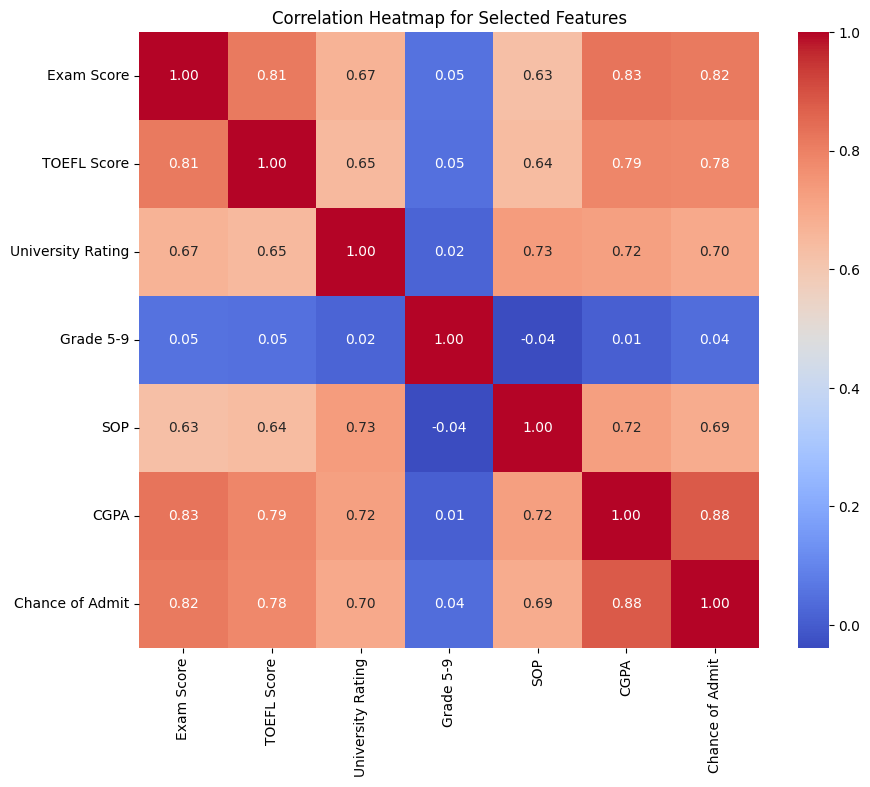

,Exam Score,TOEFL Score,University Rating,Grade 5-9,SOP,CGPA
0,311,103,3,5.36,2.0,8.09
1,322,109,5,5.03,4.5,8.80
2,308,101,2,5.16,3.0,7.90
3,319,103,3,5.77,2.5,8.76
4,331,116,5,5.51,5.0,9.38


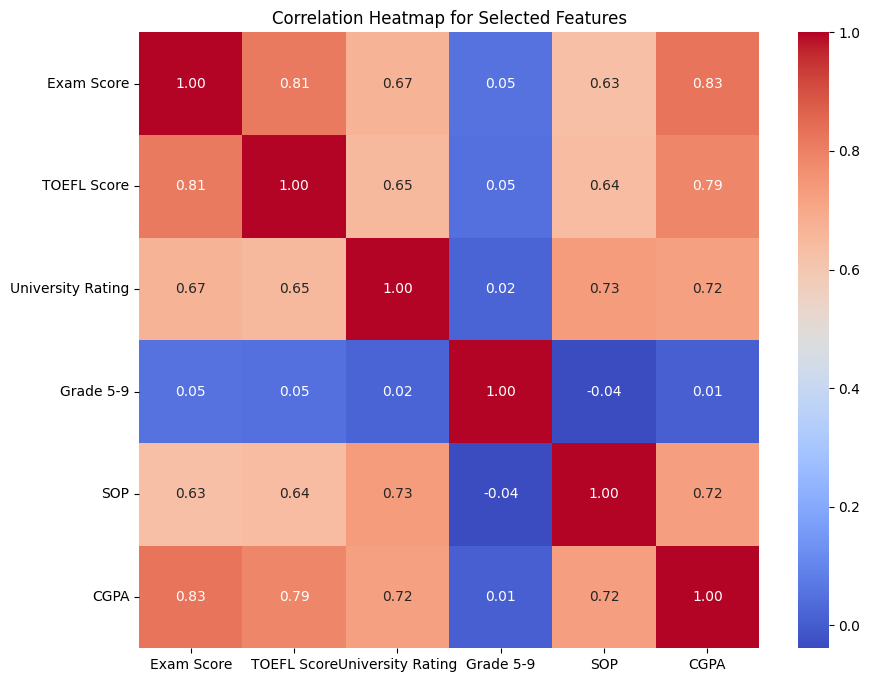

In [3]:
# Chosen features:
# 1. Exam Score: Academic capability indicator.
# 2. TOEFL Score: English proficiency and suitability for an English-language academic environment.
# 3. University Rating: Influence of the university's reputation on admission chances.
# 4. Grade 5-9: Academic consistency and achievements during formative years.
# 5. SOP (Statement of Purpose): Reflects motivation, goals, and program suitability.
# 7. CGPA (Cumulative Grade Point Average): Critical factor indicating overall academic performance.

selected_features = ['Exam Score', 'TOEFL Score', 'University Rating', 'Grade 5-9', 'SOP', 'CGPA']

# Select the relevant columns
selected_data = data[selected_features + ['Chance of Admit']]

# Display the selected data
display(selected_data.head())

# Visualize the correlation heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

selected_test_features = ['Exam Score', 'TOEFL Score', 'University Rating', 'Grade 5-9', 'SOP', 'CGPA']

# Select the relevant columns
selected_test_data = data[selected_features]

# Display the selected data
display(selected_test_data.head())

# Visualize the correlation heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_test_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


Task 3: Using the scikit-learn library (https://scikit-learn.org/), implement 2 types of Linear Regression. You can choose between Ordinary Least Squares, Ridge, Lasso, Least-angle regression (LARS) and other types offered by the scikit-learn library. Alternatively, implement the code from scratch using the pseudocode from the slides using any programming language.

Make predictions on the test set and report MSE on the train set.

OLS Mean Squared Error on Train Set: 0.0036837183319669464
Ridge Mean Squared Error on Train Set: 0.003685462025835812


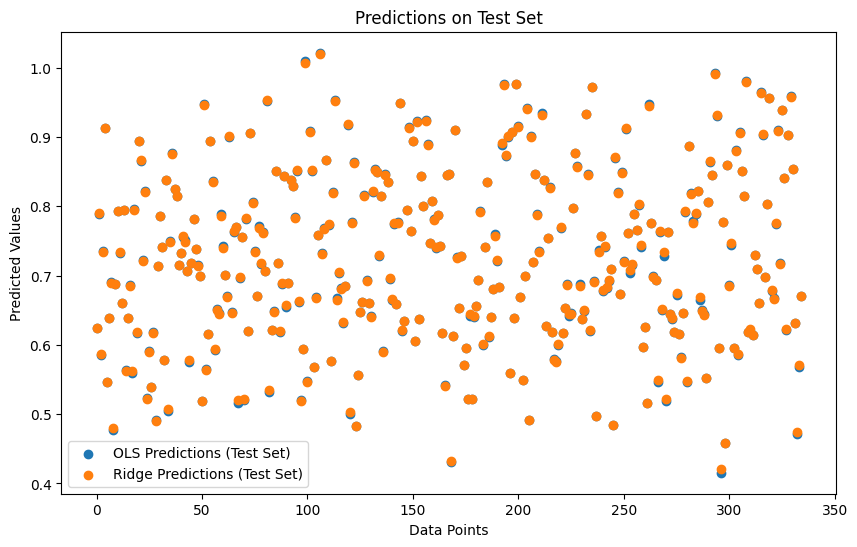

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


# Features and target variable
x_train = selected_data.drop('Chance of Admit', axis=1)
y_train = selected_data['Chance of Admit']

# Features for testing
x_test = selected_test_data

# Ordinary Least Squares Regression
ols_model = LinearRegression()
ols_model.fit(x_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Predictions on the test set
ols_predictions_test = ols_model.predict(x_test)
ridge_predictions_test = ridge_model.predict(x_test)

# Calculate MSE on the training set
ols_predictions_train = ols_model.predict(x_train)
ridge_predictions_train = ridge_model.predict(x_train)

# Evaluate models
ols_mse_train = mean_squared_error(y_train, ols_predictions_train)
ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)

# Display results
print("OLS Mean Squared Error on Train Set:", ols_mse_train)
print("Ridge Mean Squared Error on Train Set:", ridge_mse_train)

# Visualize predictions on the test set
plt.figure(figsize=(10, 6))

plt.scatter(range(len(ols_predictions_test)), ols_predictions_test, label='OLS Predictions (Test Set)')
plt.scatter(range(len(ridge_predictions_test)), ridge_predictions_test, label='Ridge Predictions (Test Set)')

plt.title('Predictions on Test Set')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Task 4: Draw a scheme of a neural network model that can perform linear regression on the given dataset. It should have at least 1 hidden layer. You should mention the sizes of each layer (number of parameters), the activation functions, as well as the inputs and outputs of the network.

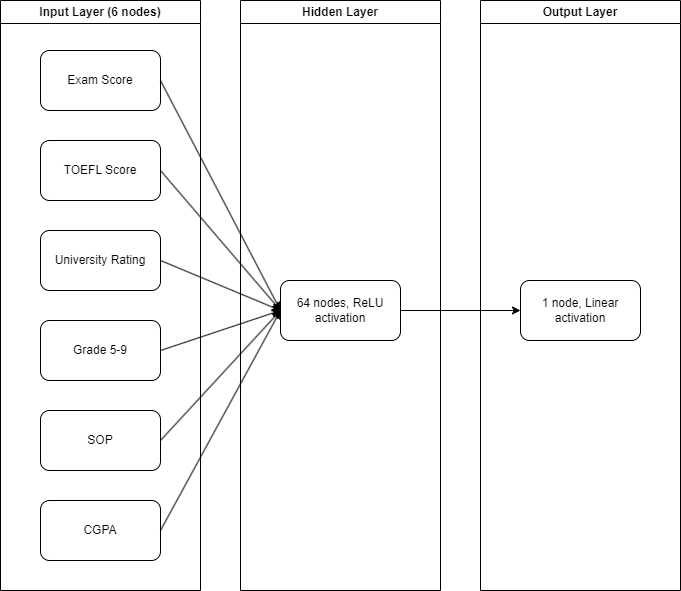

Input Layer (x_train.shape[1] features):

- Nodes: Number of features in the input data

Hidden Layer 1:

- Nodes: 64
- Type: Dense (fully connected)
- Activation: ReLU
- Parameters: (Number of input features + 1) * Number of nodes = (x_train.shape[1] + 1) * 64

Output Layer:

- Nodes: 1
- Type: Dense (fully connected)
- Activation: Linear activation
- Parameters: (Number of nodes in the previous layer + 1) * Number of nodes = (64 + 1) * 1

Total Parameters:

- Number of parameters = Parameters in Hidden Layer 1 + Parameters in Output Layer
- Total parameters = (X_train.shape[1] + 1) * 64 + (64 + 1) * 1

Task 5: Using Tensorflow or PyTorch, implement a neural network model that will perform regression on the given dataset, in order to predict the chances of admissions. Your model should have at least 1 hidden layer. You can use the model from the previous task, or implement a different model, but you should argument why or why not you are using the same model described in task 4. Make predictions on the test set and report MSE on the train set.

When deciding to use the same diagram as in Task 4, with a single hidden layer, several considerations support this choice:

1. Simplicity for Linear Regression Tasks:
   - In the context of linear regression tasks, opting for a single hidden layer aligns with the principle of simplicity. This design choice reflects the straightforward nature of linear relationships within the data.

2. Mitigating Overfitting Risks:
   - The decision to maintain a single hidden layer is driven by the need to mitigate the risk of overfitting. Additional hidden layers might introduce complexity that, in the absence of non-linear relationships, could lead to the model capturing noise and hindering generalization.

3. Enhancing Model Interpretability:
   - A single hidden layer contributes to the model's interpretability, facilitating a clearer understanding of the relationships between input features and the predicted output. This transparency is valuable in scenarios where a straightforward interpretation of the model is essential.

4. Balancing Complexity and Generalization:
   - The chosen architecture strikes a balance between capturing essential patterns in the data and avoiding unnecessary complexity. This balance is crucial for achieving a model that generalizes well to new, unseen data while remaining effective in addressing the simplicity inherent in linear regression tasks.

5. Aligning Architecture with Problem Characteristics:
   - By maintaining a single hidden layer, the neural network's architecture aligns seamlessly with the characteristics of linear regression problems. This choice reflects a tailored approach that acknowledges the specific demands of the task at hand.

In [ ]:
# pip install tensorflow

11/11 [==============================] - 0s 3ms/step
Train Mean Squared Error: 0.12502151665235936


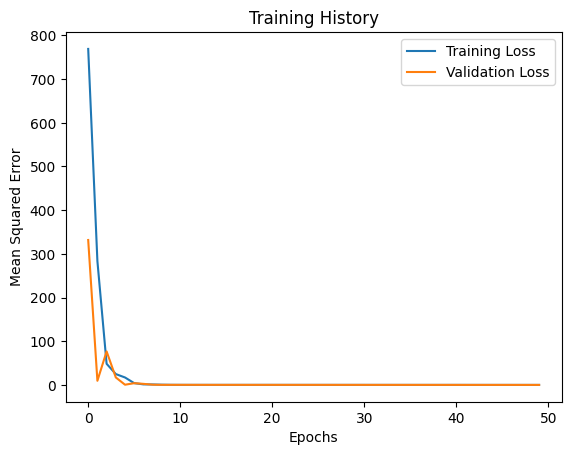

11/11 [==============================] - 0s 3ms/step


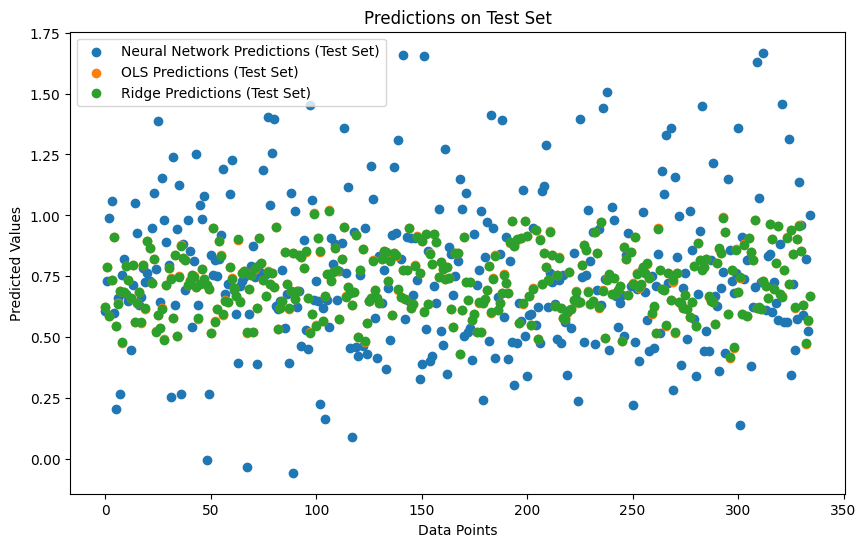

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features and target variable for training
x_train = selected_data.drop('Chance of Admit', axis=1)
y_train = selected_data['Chance of Admit']

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Calculate MSE on the train set
train_predictions = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_predictions)
print("Train Mean Squared Error:", train_mse)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()

# Features for testing
x_test = selected_test_data

# Make predictions on the test set
test_predictions = model.predict(x_test)
ols_predictions_test = ols_model.predict(x_test)
ridge_predictions_test = ridge_model.predict(x_test)

# Visualize predictions on the test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_predictions)), test_predictions, label='Neural Network Predictions (Test Set)')
plt.scatter(range(len(ols_predictions_test)), ols_predictions_test, label='OLS Predictions (Test Set)')
plt.scatter(range(len(ridge_predictions_test)), ridge_predictions_test, label='Ridge Predictions (Test Set)')

plt.title('Predictions on Test Set')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# Conclusions

The laboratory work navigated a systematic journey from data analysis and feature selection to the implementation of both linear regression and neural network models for predicting admission chances. The exploration provided valuable insights into influential factors, showcasing the adaptability of machine learning in addressing nuanced admission predictions. The applied methodologies, including TensorFlow for neural network implementation, lay a solid foundation for data-driven decision-making in academic admissions.
